Creation data visualization using Matplotlib with:
- Bar Plot
- Histogram
- Pie Chart
- Scatter Plot
- Box Plot
- Maps with Folium

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import folium

from scipy import stats

pd.set_option('display.precision', 2)

%matplotlib inline

## Data Loading

In [2]:
df = pd.read_csv('data/FIFA_data.csv', index_col=[0])

df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df.shape

(18206, 88)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18206 entries, 0 to 18205
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18206 non-null  int64  
 1   Name                      18206 non-null  object 
 2   Age                       18206 non-null  int64  
 3   Photo                     18206 non-null  object 
 4   Nationality               18206 non-null  object 
 5   Flag                      18206 non-null  object 
 6   Overall                   18206 non-null  int64  
 7   Potential                 18206 non-null  int64  
 8   Club                      17965 non-null  object 
 9   Club Logo                 18206 non-null  object 
 10  Value                     18206 non-null  object 
 11  Wage                      18206 non-null  object 
 12  Special                   18206 non-null  int64  
 13  Preferred Foot            18158 non-null  object 
 14  Intern

In [5]:
df.isna().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [6]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

## Data Visualization

### Average Overall Point by Position

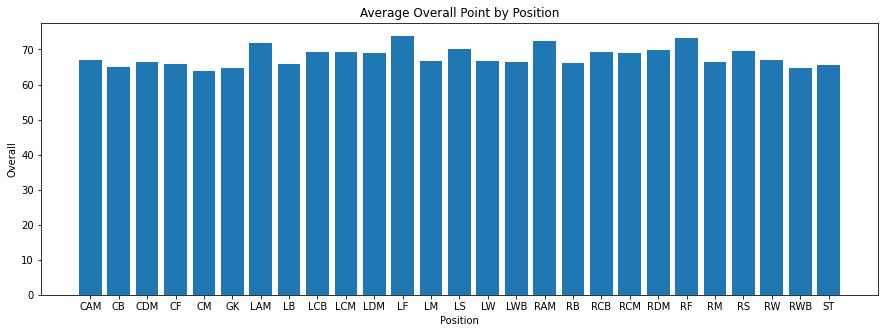

In [7]:
plt.figure(figsize=(15, 5))
plt.bar(x=df.groupby(by='Position')['Overall'].mean().index, height=df.groupby(by='Position')['Overall'].mean())
plt.xlabel('Position')
plt.ylabel('Overall')
plt.title("Average Overall Point by Position")
plt.show()

### Distribution of players' potential

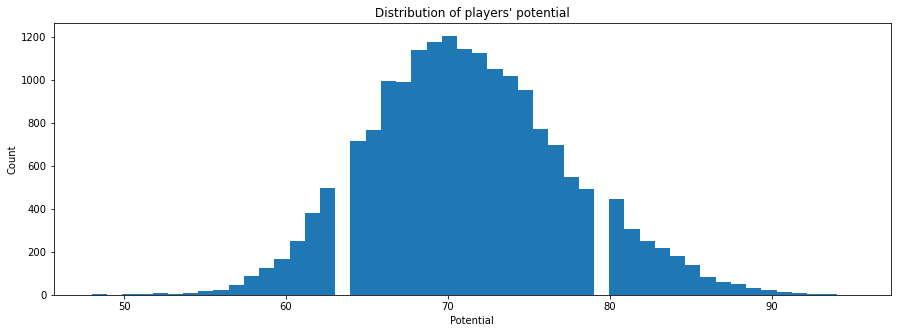

In [8]:
plt.figure(figsize=(15, 5))
plt.hist(x=df['Potential'], bins=50)
plt.xlabel('Potential')
plt.ylabel('Count')
plt.title("Distribution of players' potential")
plt.show()

### Composition of players' position

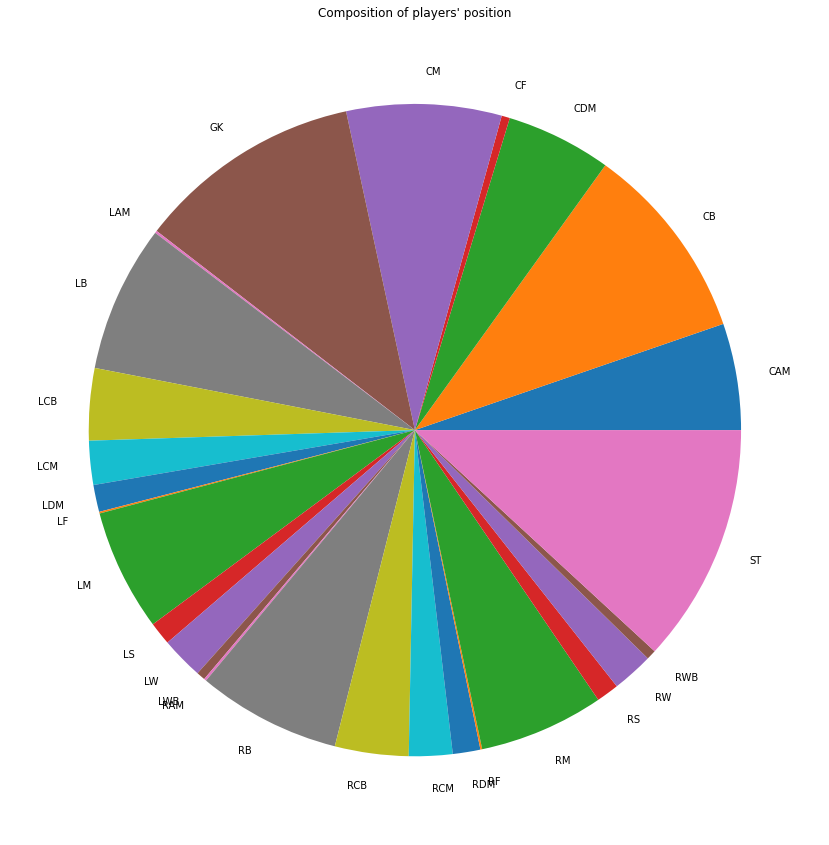

In [9]:
plt.figure(figsize=(15, 15))
plt.pie(x=df.groupby('Position')['ID'].count(), labels=df.groupby('Position')['ID'].count().index)
plt.title("Composition of players' position")
plt.show()

### Relation between Strength and Agility

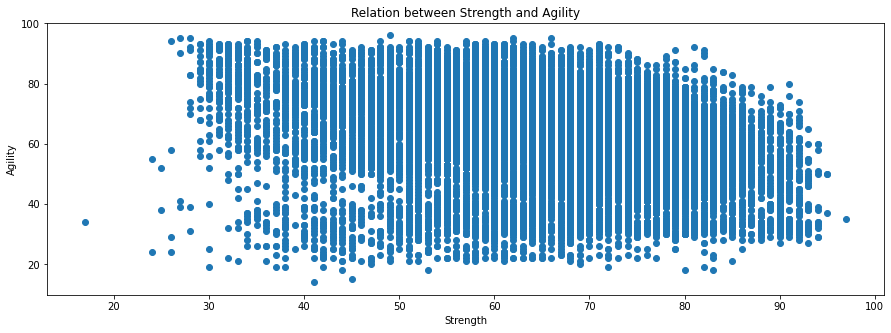

In [10]:
plt.figure(figsize=(15, 5))
plt.scatter(x=df['Strength'], y=df['Agility'])
plt.xlabel('Strength')
plt.ylabel('Agility')
plt.title("Relation between Strength and Agility")
plt.show()

### Players' Potential

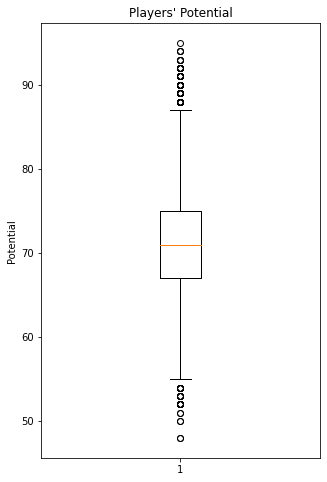

In [11]:
plt.figure(figsize=(5, 8))
plt.boxplot(x=df['Potential'])
plt.ylabel('Potential')
plt.title("Players' Potential")
plt.show()

### Players' Overall Point across Nationality

In [12]:
world_geo = r'data/world_countries.json' # geojson file

# Create a DataFrame grouping the Nationality
df_nationality = pd.DataFrame(df.groupby('Nationality')['Overall'].mean()).reset_index()

# Create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Create Choropleth map class using the overall points of players grouped by nationality
folium.Choropleth(
    geo_data=world_geo,
    data=df_nationality,
    columns=['Nationality', 'Overall'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name="Players Overall Point across Nationality"
).add_to(world_map)

# display map
world_map